In [1]:
import pandas as pd
import numpy as np
import os 
import sys

sys.path.insert(0, os.path.abspath('../'))
import common.utils as utils
import inference.encode as encode
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
Using TensorFlow backend.


None
/usr/local/cuda-9.0/lib64::/usr/local:/usr/local/lib:/usr/local/lib/openmpi


__LOADING TRAIN SET META__

In [2]:
meta_path = '/media/serge/Work/uuip/crdf/data/clef2019/TrainingSet_metaData.csv' #TODO: put your path
meta = pd.DataFrame.from_csv(meta_path)
meta.describe()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  


,md_Disability,md_Relapse,md_SymptomsOfTB,md_Comorbidity,md_Bacillary,md_DrugResistance,md_HigherEducation,md_ExPrisoner,md_Alcoholic,md_Smoking,md_Severity,SVR_Severity,CTR_LeftLungAffected,CTR_RightLungAffected,CTR_LungCapacityDecrease,CTR_Calcification,CTR_Pleurisy,CTR_Caverns
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.00000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.00000,218.000000,218.000000
mean,0.155963,0.348624,0.536697,0.559633,0.848624,2.018349,0.12844,0.123853,0.224771,0.522936,3.339450,0.490826,0.715596,0.811927,0.293578,0.12844,0.073394,0.408257
std,0.363656,0.477631,0.499799,0.497574,0.359240,1.526912,0.33535,0.330172,0.418392,0.500623,1.053589,0.501066,0.452168,0.391670,0.456449,0.33535,0.261383,0.492642
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,1.000000,1.000000,3.000000,0.00000,0.000000,0.000000,1.000000,4.000000,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.00000,0.000000,0.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,0.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.00000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


__GETTING TARGET LABEL FOR TRAIN SET__

In [3]:


# y_cols = ['CTR_LeftLungAffected', 
#           'CTR_RightLungAffected', 
#           'CTR_Calcification', 
#           'CTR_Caverns', 
#           'CTR_Pleurisy', 
#           'CTR_LungCapacityDecrease',
#           'SVR_Severity']

y_cols = ['SVR_Severity']
print ('target(s): ', y_cols)
meta = meta[y_cols]
meta.describe()
meta

target(s):  ['SVR_Severity']


,SVR_Severity
Filename,
CTR_TRN_005.nii.gz,1
CTR_TRN_008.nii.gz,1
CTR_TRN_009.nii.gz,1
CTR_TRN_012.nii.gz,1
CTR_TRN_013.nii.gz,1
CTR_TRN_016.nii.gz,1
CTR_TRN_017.nii.gz,1
CTR_TRN_023.nii.gz,1
CTR_TRN_026.nii.gz,1


__GETTING IMAGE DESCRIPTORS__

In [4]:
ROOT_DIR = '/media/serge/Work/uuip/crdf/data/clef2019' #TODO: change
data_path_train = os.path.join(ROOT_DIR, 'TrainingSet')
data_path_train_masks = os.path.join(ROOT_DIR, 'TrainingSet_Masks')

train_files = utils.get_all_CT_filenames_to_load(data_path_train)
train_files_masks = utils.get_mask_path_for_CT_filenames(train_files, data_path_train_masks)
image_file_names = [os.path.basename(_) for _ in train_files]

print('ready to train on % d files' % len(train_files))

ready to train on  218 files


In [5]:
def get_descriptors(image_pathes, image_mask_pathes, L_AEC_checkpoint_path, R_AEC_checkpoint_path,  debug, model_type):
    descriptors = encode.get_descriptors(image_pathes, 
                                     image_mask_pathes, 
                                     checkpoint_path_left=L_AEC_checkpoint_path, 
                                     checkpoint_path_right=R_AEC_checkpoint_path, 
                                     debug=debug,
                                     model_type=model_type)
    descriptors = np.array(descriptors)
    print('retrieved descriptors shape: ', descriptors.shape)
    return descriptors

__GETTING IMAGE DESCRIPTORS USING MODEL WITH INVERSE ARCHITECTURE__

In [6]:
root_checkpoints_dir = './../checkpoints'
AEC1_L_checkpoint_path = os.path.join(root_checkpoints_dir, 'left_inverse/model.01-0.26.hdf5')
AEC1_R_checkpoint_path = os.path.join(root_checkpoints_dir, 'right_inverse/model.01-0.28.hdf5')

_DEBUG RUN_

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_16 (Conv3D)           (None, 128, 128, 128, 16) 448       
_________________________________________________________________
max_pooling3d_8 (MaxPooling3 (None, 64, 64, 64, 16)    0         
_________________________________________________________________
conv3d_17 (Conv3D)           (None, 64, 64, 64, 32)    13856     
_________________________________________________________________
max_pooling3d_9 (MaxPooling3 (None, 32, 32, 32, 32)    0         
_________________________________________________________________
conv3d_18 (Conv3D)           (None, 32, 32, 32, 32)    27680     
_________________________________________________________________
max_pooling3d_10 (MaxPooling (None, 16, 16, 16, 32)    0         
_________________________________________________________________
conv3d_19 (Conv3D)           (None, 16, 16, 16, 64)    55360     
__________

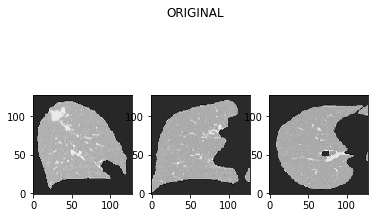

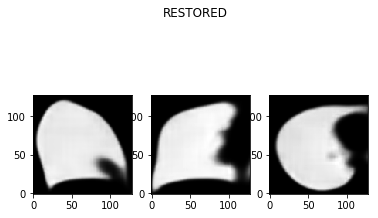

visualizing:


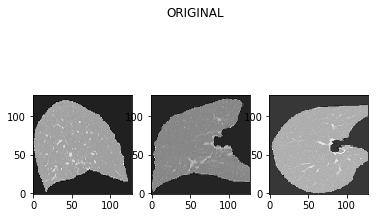

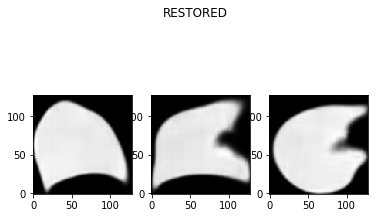

0
retrieved descriptors shape:  (1, 256)


In [8]:
N = 1
tmp = get_descriptors(train_files[:N], train_files_masks[:N], 
                AEC1_L_checkpoint_path, AEC1_R_checkpoint_path, 
                True, 1)


_FULL RUN_

In [9]:
X_INV = get_descriptors(train_files, train_files_masks, 
                AEC1_L_checkpoint_path, AEC1_R_checkpoint_path, 
                False, 1)
np.save(os.path.join(root_checkpoints_dir,'features_train_INV'), X_INV)

0
1
2


/usr/local/lib/python3.5/dist-packages/scipy/ndimage/interpolation.py:583: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
retrieved descriptors shape:  (218, 256)


In [12]:
df = pd.DataFrame(X_INV,index=image_file_names)
df.to_csv(os.path.join(root_checkpoints_dir,'features_train_INV.csv'))

__CALCULATING IMAGE DESCRIPTORS USING MODEL WITH ORIGINAL ARCHITECTURE__

In [13]:
root_checkpoints_dir = './../checkpoints'
AEC0_L_checkpoint_path = os.path.join(root_checkpoints_dir, 'left/model.10-0.10.hdf5')
AEC0_R_checkpoint_path = os.path.join(root_checkpoints_dir, 'right/model.11-0.11.hdf5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_76 (Conv3D)           (None, 128, 128, 128, 128 3584      
_________________________________________________________________
max_pooling3d_36 (MaxPooling (None, 64, 64, 64, 128)   0         
_________________________________________________________________
conv3d_77 (Conv3D)           (None, 64, 64, 64, 64)    221248    
_________________________________________________________________
max_pooling3d_37 (MaxPooling (None, 32, 32, 32, 64)    0         
_________________________________________________________________
conv3d_78 (Conv3D)           (None, 32, 32, 32, 64)    110656    
_________________________________________________________________
max_pooling3d_38 (MaxPooling (None, 16, 16, 16, 64)    0         
_________________________________________________________________
conv3d_79 (Conv3D)           (None, 16, 16, 16, 32)    55328     
__________

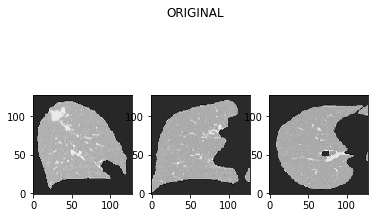

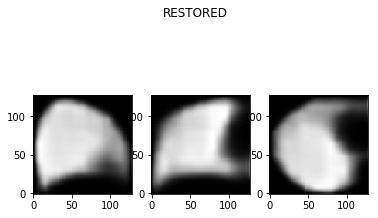

visualizing:


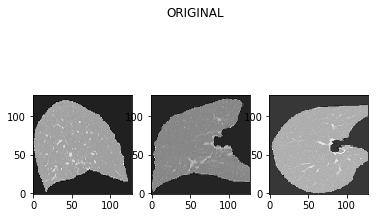

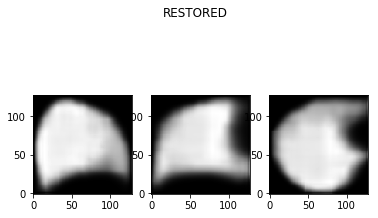

0
retrieved descriptors shape:  (1, 512)


In [14]:
N = 1
tmp = get_descriptors(train_files[:N], train_files_masks[:N], 
                AEC0_L_checkpoint_path, AEC0_R_checkpoint_path, 
                True, 0)

In [15]:
X = get_descriptors(train_files, train_files_masks, 
                AEC0_L_checkpoint_path, AEC0_R_checkpoint_path, 
                False, 0)
np.save(os.path.join(root_checkpoints_dir,'features_train'), X)
df = pd.DataFrame(X,index=image_file_names)
df.to_csv(os.path.join(root_checkpoints_dir,'features_train.csv'))

0
1
2


/usr/local/lib/python3.5/dist-packages/scipy/ndimage/interpolation.py:583: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
retrieved descriptors shape:  (218, 512)


__LOADING ALREADY CALCULATED IMAGE DESCRIPTORS__

In [ ]:
X = np.load(os.path.join(root_checkpoints_dir,'features_train.npy'))
X_INV = np.load(os.path.join(root_checkpoints_dir,'features_train_INV.npy'))

__PREPARING DATA FOR CLASSIFIERS__

In [ ]:
p = np.random.permutation(X.shape[0])
X = X[p]
X_INV = X_INV[p]
y = np.array(meta[y_cols])[p]

df = pd.DataFrame(X,index=np.arange(X.shape[0]))
df = df.loc[:, (df != 0).any(axis=0)]
df.describe()
X_CLEAN = np.array(df)
print(X_CLEAN.shape)

df = pd.DataFrame(X_INV,index=np.arange(X_INV.shape[0]))
df = df.loc[:, (df != 0).any(axis=0)]
df.describe()
X_INV_CLEAN = np.array(df)
print(X_INV_CLEAN.shape)

__SEARCHING FOR BEST PERFROMING MODEL__

In [ ]:
def get_PCA(x, N=10):
    pca = PCA(n_components=N)
    pca.fit(x)
    print(pca.explained_variance_ratio_)  
    return pca


def score_models(X, y, get_classifiers):
    N_SPLITS = 4
    kf = KFold(n_splits=N_SPLITS)
    ROC_AUC = dict()
    for clf in get_classifiers():
        ROC_AUC[str(clf)] = 0
    
    for train_idx, val_idx in kf.split(X):
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]
        pca = get_PCA(X_train)
        X_train = pca.transform(X_train)
        X_val = pca.transform(X_val)
        print('transformed train and val size:', X_train.shape, X_val.shape)
        for clf in get_classifiers():
            clf.fit(X_train, y_train)
            y_pred = clf.predict_proba(X_val)
            ROC_AUC[str(clf)] += roc_auc_score(y_val, y_pred[:, 1]) * 1.0 / N_SPLITS
    
    return ROC_AUC

def get_classifiers():
    return [SVC(kernel='linear', probability=True),
         SVC(kernel='poly',degree=2, probability=True),
         SVC(kernel='rbf',degree=3, probability=True),
         KNeighborsClassifier(n_neighbors=3),
         KNeighborsClassifier(n_neighbors=5),
         KNeighborsClassifier(n_neighbors=7),
         RandomForestClassifier(n_estimators=10, max_depth=2),
         RandomForestClassifier(n_estimators=20, max_depth=1),
         RandomForestClassifier(n_estimators=50, max_depth=1),
         RandomForestClassifier(n_estimators=100, max_depth=3)]

In [ ]:
score_models(X_INV, y, get_classifiers)